In [1]:
import sys
sys.path.insert(1, "../")

import importlib
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
def reload_modules():
    import ghost_unfairness
    importlib.reload(ghost_unfairness.fair_dataset)
    importlib.reload(ghost_unfairness.utils)
    
reload_modules()

from ghost_unfairness.fair_dataset import FairDataset, default_mappings

from ghost_unfairness.utils import *

In [3]:
protected = ["sex"]
privileged_classes = [['Male']]
metadata = default_mappings.copy()
metadata['protected_attribute_maps'] = [{1.0: 'Male', 0.0: 'Female'}]

alpha = 0.5
beta = 1

kwargs = {'protected_attribute_names': protected,
          'privileged_classes': [['Male']],
          'metadata':metadata,
          'favorable_classes': [1],
          'beta': beta,
          'alpha': alpha,
          'ds': True
         }

random_state = 47
model_type = GaussianNB

In [4]:
from copy import deepcopy
dist = {
    'mu_ps': {'p': 3, 'u': 0},
    'sigma_ps': {'p': 2, 'u': 5},
    'mu_ns': {'p': 3, 'u': 0},
    'sigma_ns': {'p': 2, 'u': 5},
}

results = {'p' : [], 'u': [], 'm': []}
deltas = []
start = 1
end = 20
for i in range(start, end):
    temp_dist = deepcopy(dist)
    mu_ps = temp_dist['mu_ps']
    for k in mu_ps:
        mu_ps[k] = mu_ps[k] + i
    kwargs['dist'] = temp_dist
    print(kwargs['dist'])    
    
    kwargs['verbose'] = False
    train_fd, test_fd = get_datasets(10000, 2, 1, kwargs, test_random_state=23)
    pmod, pmod_results = get_groupwise_performance(train_fd, train_fd, model_type,
                                                   privileged=True, pos_rate=True)
    umod, umod_results = get_groupwise_performance(train_fd, train_fd, model_type,
                                                   privileged=False, pos_rate=True)
    mod, mod_results = get_groupwise_performance(train_fd, train_fd, model_type,
                                                 privileged=None, pos_rate=True)
    
    # is_u_optimal = umod_results[4] >= pmod_results[4] and umod_results[4] >= mod_results[4] 
    is_u_optimal = umod_results[4] > pmod_results[4]
    # is_p_optimal = pmod_results[3] >= umod_results[3] and pmod_results[3] >= mod_results[3]
    is_p_optimal = pmod_results[3] > umod_results[3]
    is_m_optimal = mod_results[2] > umod_results[2] and mod_results[2] > pmod_results[2]
    
    opt_diff = is_u_optimal and is_p_optimal and is_m_optimal
    
    violates = mod_results[1] > umod_results[1] and mod_results[1] > pmod_results[1]
    
    kwargs['verbose'] = True
    if kwargs['verbose']:
        print(opt_diff)
    
        print('Violates', opt_diff and violates)
    
        print('pmod_results', *pmod_results, sep='\t')
        print('umod_results', *umod_results, sep='\t')
        print('mod_results', *mod_results, sep='\t')
    assert not (opt_diff and violates)
    
    # if opt_diff and not violates:
    results['p'].append(pmod_results)
    results['u'].append(umod_results)
    results['m'].append(mod_results)

    # print(kwargs)

{'mu_ps': {'p': 4, 'u': 1}, 'sigma_ps': {'p': 2, 'u': 5}, 'mu_ns': {'p': 3, 'u': 0}, 'sigma_ns': {'p': 2, 'u': 5}}
False
Violates False
pmod_results	-0.0008000000000000229	0.9983964722389256	0.0016035277610744192	0.5525	0.5991	0.5059	0.598	0.3998	0.504	0.4922
umod_results	0.012799999999999978	1.0257389905489644	0.025738990548964447	0.5214	0.5029	0.5399	0.5002	0.4944	0.55	0.4702
mod_results	0.0024999999999999467	1.0048933255040124	0.004893325504012447	0.55225	0.5859	0.5186	0.5968	0.425	0.532	0.4948
{'mu_ps': {'p': 5, 'u': 2}, 'sigma_ps': {'p': 2, 'u': 5}, 'mu_ns': {'p': 3, 'u': 0}, 'sigma_ns': {'p': 2, 'u': 5}}
False
Violates False
pmod_results	-0.0006999999999999784	0.9985963505113294	0.0014036494886705553	0.59745	0.6893	0.5056	0.688	0.3094	0.5036	0.4924
umod_results	0.0131	1.0265773990667477	0.02657739906674772	0.54465	0.5099	0.5794	0.5028	0.483	0.5854	0.4266
mod_results	-0.0012999999999999678	0.9974257425742575	0.0025742574257424655	0.60455	0.6746	0.5345	0.6796	0.3304	0.5382	0.4692
{

False
Violates False
pmod_results	-0.0028000000000000247	0.9944	0.005600000000000049	0.7528	1.0	0.5056	1.0	0.0	0.5028	0.4916
umod_results	0.05629999999999996	1.1271167306389702	0.12711673063897022	0.73865	0.5089	0.9684	0.4518	0.434	0.9676	0.0308
mod_results	0.0006000000000000449	1.0011988011988013	0.0011988011988013358	0.9639	0.9965	0.9313	0.997	0.004	0.9324	0.0698
{'mu_ps': {'p': 22, 'u': 19}, 'sigma_ps': {'p': 2, 'u': 5}, 'mu_ns': {'p': 3, 'u': 0}, 'sigma_ns': {'p': 2, 'u': 5}}
False
Violates False
pmod_results	-0.0029000000000000137	0.9942	0.005800000000000027	0.75285	1.0	0.5057	1.0	0.0	0.5028	0.4914
umod_results	0.05940000000000001	1.135092108255629	0.1350921082556289	0.7419	0.5089	0.9749	0.4486	0.4308	0.974	0.0242
mod_results	0.0034999999999999476	1.0070014002800558	0.007001400280055803	0.97005	0.9973	0.9428	0.9972	0.0026	0.9462	0.0606


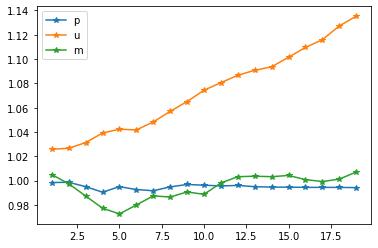

In [5]:
plt.plot(range(start, end), [i[1] for i in results['p']], '*-', label='p')
plt.plot(range(start, end), [i[1] for i in results['u']], '*-', label='u')
plt.plot(range(start, end), [i[1] for i in results['m']], '*-', label='m')
plt.legend()

-0.08299999999999996 0.00024999999999997247
-0.012699999999999934 0.0011999999999999789 0.06940000000000002 0.018000000000000016
-0.16469999999999996 -0.007099999999999995
-0.028899999999999926 0.008399999999999963 0.15259999999999996 0.04720000000000002
-0.24080000000000001 -0.01595000000000002
-0.04749999999999999 0.01200000000000001 0.2268 0.07119999999999993
-0.30400000000000005 -0.023850000000000038
-0.0685 0.017199999999999993 0.284 0.09179999999999999
-0.35550000000000004 -0.03210000000000002
-0.09239999999999993 0.02180000000000004 0.33140000000000003 0.10439999999999994
-0.39359999999999995 -0.04479999999999995
-0.1179 0.026599999999999957 0.37060000000000004 0.11080000000000001
-0.4202 -0.05894999999999995
-0.14579999999999993 0.030000000000000027 0.3974 0.11520000000000008
-0.4385 -0.07420000000000004
-0.17669999999999997 0.026599999999999957 0.411 0.11639999999999995
-0.4514 -0.09135000000000004
-0.2107 0.024599999999999955 0.4194 0.10560000000000003
-0.46299999999999997 -0

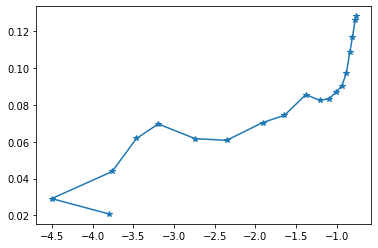

In [6]:
c_by_ds = []
di_diffs = []
for i in range(0, end - start):
    pmod_res = results['p'][i]
    umod_res = results['u'][i]
    mod_res = results['m'][i]
    di_u = umod_res[1]
    di = mod_res[1]
    acc_diff_u =  umod_res[4] - mod_res[4]
    acc_diff_p = pmod_res[3] - mod_res[3]
    print(acc_diff_u, acc_diff_p)
    del_p_plus = pmod_res[5] - mod_res[5] 
    del_p_minus = pmod_res[6] - mod_res[6]

    del_u_plus = umod_res[7] - mod_res[7]
    del_u_minus = umod_res[8] - mod_res[8]
    print(del_p_plus, del_p_minus, del_u_plus, del_u_minus)
    c = acc_diff_u + 2 * (1-alpha) * del_u_minus
    d = acc_diff_p + 2 * (1-alpha) * del_p_minus
    if d == 0:
        break
    c_by_ds.append(c/d)
    di_diffs.append(di_u - di)
    if c > d:
        assert di < di_u
        
print(*list(zip(c_by_ds, di_diffs)),sep='\n')

plt.plot(-np.log(np.abs(c_by_ds)), di_diffs, '*-')

In [7]:
acc_diff_u = [(i[0][4] - i[1][4]) for i in zip(results['u'], results['m'])]
acc_diff_u
acc_diff_p = [(i[0][3] - i[1][3]) for i in zip(results['p'], results['m'])]
acc_diff_p
di_diff = [i[0][1] - i[1][1] for i in zip(results['u'], results['m'])]
di_diff

[0.020845665044952,
 0.029151656492490186,
 0.04387848810249051,
 0.061771820695102564,
 0.0696467919517999,
 0.061695541094909156,
 0.06075998380029557,
 0.07040377532097086,
 0.07431208924795196,
 0.08557712107692106,
 0.0824543698071235,
 0.08336816332800723,
 0.08706385278615159,
 0.09033317172521937,
 0.09719752187891229,
 0.10865274571907846,
 0.11657198259105028,
 0.12591792944016889,
 0.1280907079755731]

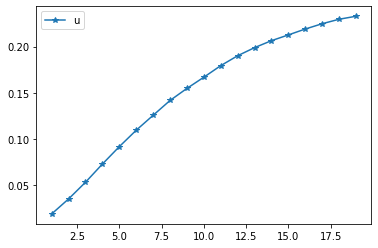

In [8]:
#plt.plot(range(-10, n), [i[3] for i in results['p']], '*-', label='p')
plt.plot(range(start, end), [abs(i[3] - i[4]) for i in results['u']], '*-', label='u')
#plt.plot(range(-10, n), [i[2] for i in results['m']], '*-', label='m')
plt.legend()

In [9]:
dist = {
    'mu_ps': {'p': 13, 'u': 10},
    'sigma_ps': {'p': 2, 'u': 5},
    'mu_ns': {'p': 3, 'u': 0},
    'sigma_ns': {'p': 2, 'u': 5},
}

model_results = {'p': [], 'u': [], 'm': []}
kwargs['dist'] = dist
model_types = [GaussianNB, LogisticRegression, DecisionTreeClassifier]
for model_type in model_types:
    
    kwargs['verbose'] = False
    train_fd, test_fd = get_datasets(10000, 10, 3, kwargs, test_random_state=47)
    pmod, pmod_results = get_groupwise_performance(train_fd, train_fd, model_type,
                                                   privileged=True, pos_rate=True)
    umod, umod_results = get_groupwise_performance(train_fd, train_fd, model_type,
                                                   privileged=False, pos_rate=True)
    mod, mod_results = get_groupwise_performance(train_fd, train_fd, model_type,
                                                 privileged=None, pos_rate=True)
    
    kwargs['verbose'] = True
    if kwargs['verbose']:
        print(opt_diff)
    
        print('Violates', opt_diff and violates)
    
        print('pmod_results', *pmod_results, sep='\t')
        print('umod_results', *umod_results, sep='\t')
        print('mod_results', *mod_results, sep='\t')
    model_results['p'].append(pmod_results)
    model_results['u'].append(umod_results)
    model_results['m'].append(mod_results)


False
Violates False
pmod_results	-0.006599999999999995	0.9868	0.01319999999999999	0.749	1.0	0.498	1.0	0.0	0.4914	0.4954
umod_results	0.011699999999999988	1.024108798681228	0.02410879868122806	0.72925	0.4971	0.9614	0.4824	0.4882	0.9584	0.0356
mod_results	-0.00029999999999996696	0.9994003597841296	0.000599640215870445	0.93305	0.9997	0.8664	1.0	0.0006	0.8664	0.1336
False
Violates False
pmod_results	0.06430000000000002	1.1286	0.12860000000000005	0.65585	0.9998	0.3119	0.9998	0.0002	0.3762	0.7524
umod_results	-0.00029999999999996696	0.9993989180524946	0.0006010819475054108	0.69875	0.4365	0.961	0.4356	0.5626	0.9598	0.0378
mod_results	0.0030000000000000027	1.0060253062864029	0.006025306286402854	0.9604	0.9879	0.9329	0.9858	0.01	0.9338	0.068
False
Violates False
pmod_results	-0.031200000000000006	0.9376	0.06240000000000001	0.7484	1.0	0.4968	1.0	0.0	0.4656	0.472
umod_results	-0.017200000000000104	0.9675349188372969	0.03246508116270308	0.7278	0.5018	0.9538	0.5316	0.528	0.9664	0.0588
mod_results	

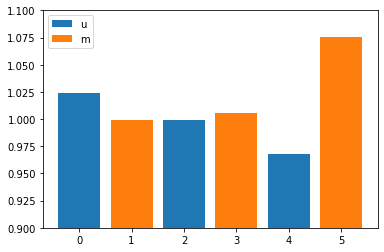

In [10]:
plt.bar(range(0, len(model_types)*2, 2), [i[1] for i in model_results['u']], label='u')
plt.bar(range(1, len(model_types)*2, 2), [i[1] for i in model_results['m']], label= 'm')
plt.ylim(0.9, 1.1)
plt.legend()

In [11]:
from copy import deepcopy
dist = {
    'mu_ps': {'p': 13, 'u': 10},
    'sigma_ps': {'p': 2, 'u': 5},
    'mu_ns': {'p': 3, 'u': 0},
    'sigma_ns': {'p': 2, 'u': 5},
}

results = {'p' : [], 'u': [], 'm': []}
start = 0
end = 10
for i in range(start, end):
    temp_dist = deepcopy(dist)
    sigma_ps = temp_dist['sigma_ps']
    sigma_ns = temp_dist['sigma_ns']
    sigma_ps['u'] = sigma_ps['u'] + i
    sigma_ns['u'] = sigma_ns['u'] + i

    print(temp_dist)    
    kwargs['dist'] = temp_dist
    kwargs['verbose'] = False
    
    train_fd, test_fd = get_datasets(10000, 2, 1, kwargs, test_random_state=47)
    pmod, pmod_results = get_groupwise_performance(train_fd, train_fd, model_type,
                                                   privileged=True, pos_rate=True)
    umod, umod_results = get_groupwise_performance(train_fd, train_fd, model_type,
                                                   privileged=False, pos_rate=True)
    mod, mod_results = get_groupwise_performance(train_fd, train_fd, model_type,
                                                 privileged=None, pos_rate=True)
    
    results['p'].append(pmod_results)
    results['u'].append(umod_results)
    results['m'].append(mod_results)

    # print(kwargs)

{'mu_ps': {'p': 13, 'u': 10}, 'sigma_ps': {'p': 2, 'u': 5}, 'mu_ns': {'p': 3, 'u': 0}, 'sigma_ns': {'p': 2, 'u': 5}}
{'mu_ps': {'p': 13, 'u': 10}, 'sigma_ps': {'p': 2, 'u': 6}, 'mu_ns': {'p': 3, 'u': 0}, 'sigma_ns': {'p': 2, 'u': 6}}
{'mu_ps': {'p': 13, 'u': 10}, 'sigma_ps': {'p': 2, 'u': 7}, 'mu_ns': {'p': 3, 'u': 0}, 'sigma_ns': {'p': 2, 'u': 7}}
{'mu_ps': {'p': 13, 'u': 10}, 'sigma_ps': {'p': 2, 'u': 8}, 'mu_ns': {'p': 3, 'u': 0}, 'sigma_ns': {'p': 2, 'u': 8}}
{'mu_ps': {'p': 13, 'u': 10}, 'sigma_ps': {'p': 2, 'u': 9}, 'mu_ns': {'p': 3, 'u': 0}, 'sigma_ns': {'p': 2, 'u': 9}}
{'mu_ps': {'p': 13, 'u': 10}, 'sigma_ps': {'p': 2, 'u': 10}, 'mu_ns': {'p': 3, 'u': 0}, 'sigma_ns': {'p': 2, 'u': 10}}
{'mu_ps': {'p': 13, 'u': 10}, 'sigma_ps': {'p': 2, 'u': 11}, 'mu_ns': {'p': 3, 'u': 0}, 'sigma_ns': {'p': 2, 'u': 11}}
{'mu_ps': {'p': 13, 'u': 10}, 'sigma_ps': {'p': 2, 'u': 12}, 'mu_ns': {'p': 3, 'u': 0}, 'sigma_ns': {'p': 2, 'u': 12}}
{'mu_ps': {'p': 13, 'u': 10}, 'sigma_ps': {'p': 2, 'u': 13

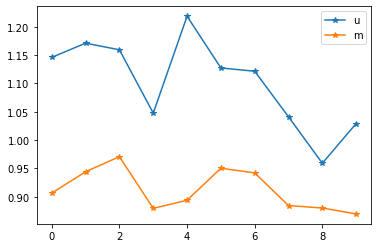

In [12]:
plt.plot(range(start, end), [i[1] for i in results['u']], '*-', label='u')
plt.plot(range(start, end), [i[1] for i in results['m']], '*-', label='m')
plt.legend()

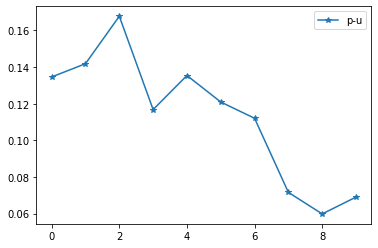

In [13]:
#plt.plot(range(-10, n), [i[3] for i in results['p']], '*-', label='p')
plt.plot(range(start, end), [abs(i[3] - i[4]) for i in results['u']], '*-', label='p-u')
#plt.plot(range(-10, n), [i[2] for i in results['m']], '*-', label='m')
plt.legend()